In [369]:
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

# Idea general

Esta se basa en encontrar el maximo/minimo local de una funcion por medio del gradiente -*el cual nos indica la "pendiente" en cada eje sobre un punto dado*-. Si bien la idea es sencilla, llevarlo a la realidad es un poco mas complejo y no hay una receta unica para lograrlo. En este ensayo trataremos de abordar este problema de manera intuitiva

## Una variable
Empecemos abordando un caso sencillo, una funcion de una variable $f(x) = sin(x)$ -cabe aclarar que no tiene sentido tratar de maximizar/minimizar un funcion que no este acotada sobre el dominio de nuestro interes-, Empecemos restringiendo esta, al dominio $[0, 2 \pi]$ y eligamos un punto arbitrario, por ejemplo $x_{0}=\frac{7}{2}$
<center><img src="Imagenes/sin_plot.jpg"></center>


En este caso:
$$\nabla sin(x_{0}) = \left( \frac{\partial f}{\partial x_{0}} \right)$$
$$\hspace{2.2cm} = \left( cos\left(\frac{7}{2}\right) \right)$$
$$\hspace{1.7cm} \approx -0.9364$$

Definimos ahora nuestra funcion auxiliar discreta para "acercarnos" al maximo local 
$$g(t): \mathbb{R}^{+}\rightarrow \mathbb{R}$$
$$g(t) = sin\left(\frac{7}{2} + t \left( \nabla sin(x_{0}) \right)\right)$$
$$g(t) = sin\left(\frac{7}{2} -  \left(0.93 \right) t \right)$$


Notemos que la funcion auxiliar es discreta, por lo tanto, podemos seleccionar el tamaño del "paso", de 1 en 1, de 2 en 2, de 10 en 10 etc. No hemos encontrado con uno de los problemas fundamentales del ascenso/descenso de gradiente el ❗️*Learning rate*❗️. 

El tamaño del paso o learning rate es fundamental. Si escogemos un paso muy pequeño, encontar el maximo/minimo mas cercao tendra un costo computacional mas grande, escoger un paso grande podria causar que nos "saltemos" el maximo/minimo mas cercano. Tomemos como ejemplo la siguiente grafica donde comparamos dos learning rate. Uno pequeño (0.2) a la izquierda y uno grande (1.2) a la derecha. La funcion auxuliar esta representada por puntos azules.
<center><img src="Imagenes/auxiliar.gif"></center>

Es por esto que el calculo del learning rate no se toma a la ligera, este no tiene una formula predeterminada, sino que su calculo depende muchas veces del contexto donde es usado y de las preferencias del desarrollador.

## Dos variables
Encontrar el maximo/local de una funcion en una variable es relativamente sencillo, solo requiere de calculo basico y moverese en una u otra direccion apropiadamente. Esto cambia cuando trabajamos con funciones de dos o mas variables. Donde nos podemos mover en infinitas direcciones, las herramientas se tornan mas complicadas -calculo maultivariable- y el costo computacional es aun mayor.

Tomemos como ejemplo la funcion $f(x,y) = cos(x)sin(y)$ en el dominio $(0,\pi) \times (0,2\pi)$ y escogamos un punto aleatorio sobre este, digamos $\left( x_{0}, y_{0}, z_{0} \right)=(\frac{2\pi}{5}, \frac{\pi}{5}, f\left(\frac{2\pi}{5}, \frac{\pi}{5} \right))$
<center><img src="Imagenes/cossin_plotS.jpg"></center>


Aplicando el gradiente tenemos:
$$\nabla cos(x_{0})sin(y_{0}) = \left(\frac{\partial f}{\partial x_{0}}, \frac{\partial f}{\partial y_{0}} \right)$$
$$\hspace{7.4cm} = \left(-sin\left(\frac{2\pi}{5}\right)sin\left(\frac{\pi}{5}\right),cos\left(\frac{2\pi}{5}\right)cos\left(\frac{\pi}{5}\right)\right)$$
$$\hspace{3cm} \approx \left( -0.5590, 0.25 \right)$$

Definimos de nuevo una funcion auxiliar discreta para "acercarnos" al maximo local pero en dos variables 
$$g(t): \mathbb{R}^{+}\rightarrow \mathbb{R}$$
$$g(t) = \left[ x_{0}, y_{0}, f\left(x_{0}, y_{0} \right) \right] +t\left[\nabla f(x_{0}, y_{0}), f\left(\nabla f(x_{0}, y_{0}) \right)\right]$$

Sin embargo, notemos que ahora tenemos una infinidad de direcciones para movernos. Calcular el gradiente en un punto ya no es suficente, se debe de calcular de nuevo con cada paso que demos, pues la "direccion" hacia le maximo/minimo no sera siempre la misma en cada punto al que lleguemos. *Por simpleza, usaremos un paso de 0.5 en 0.5*

En este ejemplo se partio desde $\left( x_{0}, y_{0}, z_{0} \right)$, nos movimos siempre en la direccion $\left(\nabla f(x_{0}, y_{0}), f\left(\nabla f(x_{0}, y_{0}) \right)\right)$ y pasamos de largo nuestro maximo local.
<center><img src="Imagenes/gradiente1.gif"></center>

Aqui podemos ver como un paso muy grande no nos lleva a ningun lado
<center><img src="Imagenes/pasoGrande.gif"></center>

Finalmente, con un paso apropiado y calculando el gradiente en cada punto nos acercamos al maximo local
<center><img src="Imagenes/multigradiente.gif"></center>

La sigueinte pregunta es "*¿Cauntas iteraciones?*" Podemos definir el numero de iteraciones de manera con dos metodos
$$\| \nabla f(x) \|<\epsilon$$

# Apendice


### Funcion $sin(x)$

''

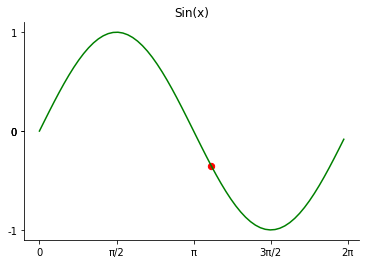

In [246]:
plt.figure(figsize=(6, 4))
plt.title("Sin(x)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
x_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
x_labels = ['0', 'π/2', 'π', '3π/2', '2π']
plt.xticks(x_ticks, x_labels)
y_ticks = [0, 1, 0, -1, 0]
y_labels = ["0", "1", "0", "-1", "0"]
plt.yticks(y_ticks, y_labels)
sin_X_data = np.arange(0, 2*np.pi, 0.1)
sin_Y_data = np.sin(sin_X_data)
plt.plot(sin_X_data, sin_Y_data, c="green")
plt.scatter(3.5, np.sin(3.5), c="red", s=40, alpha=1)
plt.savefig("imagenes/sin_plot.jpg", bbox_inches = "tight")
;


### Funcion auxiliar

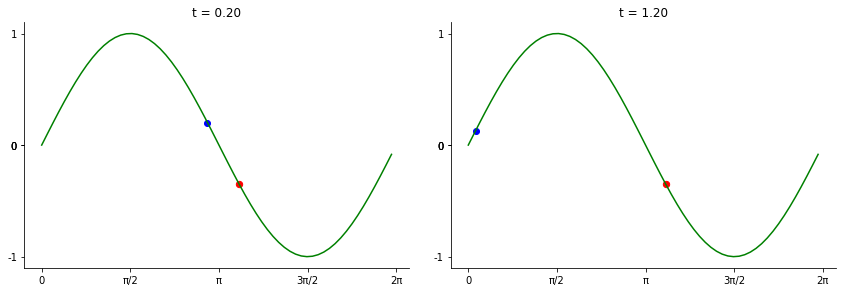

In [236]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)
fig.tight_layout()
x_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
x_labels = ["0", "π/2", "π", "3π/2", "2π"]
y_ticks = [0, 1, 0, -1, 0]
y_labels = ["0", "1", "0", "-1", "0"]
sin_X_data = np.arange(0, 2*np.pi, 0.1)
sin_Y_data = np.sin(sin_X_data)
def gFunction(t):
    gt = 3.5-t*(0.9364)
    return gt

ax1.set_title("t = 0.20")
ax1.set_xticks(x_ticks, x_labels)
ax1.set_yticks(y_ticks, y_labels)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.scatter(3.5, np.sin(3.5), c="red", s=40, alpha=1)
ax1.plot(sin_X_data, sin_Y_data, c="green")

ax2.set_title("t = 1.20")
ax2.set_xticks(x_ticks, x_labels)
ax2.set_yticks(y_ticks, y_labels)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.scatter(3.5, np.sin(3.5), c="red", s=40, alpha=1)
ax2.plot(sin_X_data, sin_Y_data, c="green")

#GIF
scat_1 = ax1.scatter(0,0, c="blue")
t_1 = [gFunction(t) for t in np.arange(0.2, 0.2*4, 0.2)]
gt_1 = [np.sin(t)for t in t_1]
scat_2 = ax2.scatter(0,0,  c="blue")
t_2 = [gFunction(t) for t in np.arange(1.2, 1.2*4, 1.2)]
gt_2 = [np.sin(t)for t in t_2]
def animate(i):
    scat_1.set_offsets((t_1[i], gt_1[i]))
    scat_2.set_offsets((t_2[i], gt_2[i]))
    return scat_1, scat_2
ani = animation.FuncAnimation(fig, animate, frames=len(t_2))
writer = animation.PillowWriter(fps=0.5)
ani.save("imagenes/auxiliar.gif", writer=writer)
plt.show()

### Funcion en dos variables $f(x,y) = cos(x)sin(y)$

/var/folders/r9/15vjzr1568bb48gqfz9wkmzc0000gn/T/ipykernel_96003/934194706.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, computed_zorder=False)


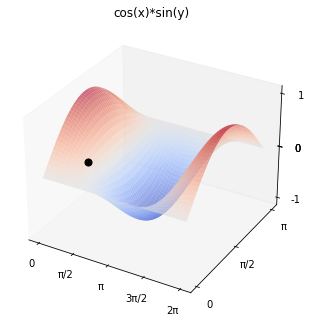

In [403]:
def func(x, y):
    return np.cos(x)*np.sin(y)
fig = plt.figure(figsize=(4,4))
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
# No puedo eliminar la adevertencia y si no uso este metodo el punto siempre aparece debajo de la superficie
ax = Axes3D(fig, computed_zorder=False)
ax.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.6)
dotCoord=[0.4*np.pi, 0.2*np.pi, func(0.4*np.pi, 0.2*np.pi)]
ax.scatter(dotCoord[0], dotCoord[1], dotCoord[2], c="black", s=50)
x_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
x_labels = ["0", "π/2", "π", "3π/2", "2π"]
y_ticks = [0, np.pi/2, np.pi]
y_labels = ["0", "π/2", "π"]
z_ticks = [0, 1, 0, -1, 0]
z_labels = ["0", "1", "0", "-1", "0"]
ax.set_xticks(x_ticks, x_labels)
ax.set_yticks(y_ticks, y_labels)
ax.set_zticks(z_ticks, z_labels)
ax.set_title("cos(x)*sin(y)")
ax.grid(False)
plt.savefig("imagenes/cossin_plot.jpg", bbox_inches = "tight")

### Gradiente en una sola direccion

/var/folders/r9/15vjzr1568bb48gqfz9wkmzc0000gn/T/ipykernel_96003/639571927.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, computed_zorder=False)


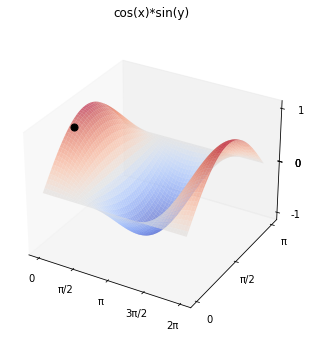

In [425]:
def func(x, y):
    return np.cos(x)*np.sin(y)
fig = plt.figure(figsize=(4,5))
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
ax = Axes3D(fig, computed_zorder=False)
ax.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.6)
x_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
x_labels = ["0", "π/2", "π", "3π/2", "2π"]
y_ticks = [0, np.pi/2, np.pi]
y_labels = ["0", "π/2", "π"]
z_ticks = [0, 1, 0, -1, 0]
z_labels = ["0", "1", "0", "-1", "0"]
ax.set_xticks(x_ticks, x_labels)
ax.set_yticks(y_ticks, y_labels)
ax.set_zticks(z_ticks, z_labels)
ax.set_title("cos(x)*sin(y)\n")
ax.grid(False)
# Gradiente
paso = 0.5
x_Coord = [0.4*np.pi]
y_Coord = [0.2*np.pi]
z_Coord = [func(x_Coord[0], y_Coord[0])]
gradF = [-0.5590, 0.25, func(-0.5590, 0.25)]
for n in range(5):
    x_Coord.append(x_Coord[n] + paso*(gradF[0]))
    y_Coord.append(y_Coord[n] + paso*(gradF[1]))
    z_Coord.append(z_Coord[n] + paso*(gradF[2]))
#GIF
scat_1 = ax.scatter(x_Coord[0], y_Coord[0], z_Coord[0], c="black", s=50)
def animate(i):
    scat_1._offsets3d = (x_Coord[i:i+1], y_Coord[i:i+1], z_Coord[i:i+1])
    return scat_1
ani = animation.FuncAnimation(fig, animate, frames=len(z_Coord))
writer = animation.PillowWriter(fps=1)
ani.save("Imagenes/gradiente1.gif", writer=writer)
plt.show()

### Gradiente en varias direcciones

/var/folders/r9/15vjzr1568bb48gqfz9wkmzc0000gn/T/ipykernel_96003/2196868608.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, computed_zorder=False)


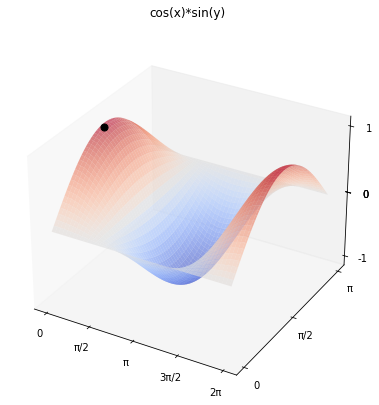

In [493]:
def func(x, y):
    return np.cos(x)*np.sin(y)
def grad(x, y):
    return np.array([-np.sin(x)*np.sin(y), np.cos(x)*np.cos(y)])
fig = plt.figure(figsize=(5,6))
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
ax = Axes3D(fig, computed_zorder=False)
ax.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.6)
x_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
x_labels = ["0", "π/2", "π", "3π/2", "2π"]
y_ticks = [0, np.pi/2, np.pi]
y_labels = ["0", "π/2", "π"]
z_ticks = [0, 1, 0, -1, 0]
z_labels = ["0", "1", "0", "-1", "0"]
ax.set_xticks(x_ticks, x_labels)
ax.set_yticks(y_ticks, y_labels)
ax.set_zticks(z_ticks, z_labels)
ax.set_title("cos(x)*sin(y)\n")
ax.grid(False)
# Gradiente
paso = 0.5
x_Coord = np.array([0.4*np.pi])
y_Coord = np.array([0.2*np.pi])
z_Coord = np.array([func(x_Coord[0], y_Coord[0])])
for n in range(5):
    GRAD = grad(x_Coord[n], y_Coord[n])
    x_Coord = np.append(x_Coord, x_Coord[n] + paso*GRAD[0])
    y_Coord = np.append(y_Coord, y_Coord[n] + paso*GRAD[1])
    z_Coord = np.append(z_Coord, func(x_Coord[n+1], y_Coord[n+1]))
#GIF
scat_1 = ax.scatter(x_Coord[0], y_Coord[0], z_Coord[0], c="black", s=50)
def animate(i):
    scat_1._offsets3d = (x_Coord[i:i+1], y_Coord[i:i+1], z_Coord[i:i+1])
    return scat_1
ani = animation.FuncAnimation(fig, animate, frames=len(z_Coord))
writer = animation.PillowWriter(fps=1)
ani.save("Imagenes/multigradiente.gif", writer=writer)
plt.show()

### Un paso muy grande y muchas iteraciones no nos llevan a nada

/var/folders/r9/15vjzr1568bb48gqfz9wkmzc0000gn/T/ipykernel_96003/1695556221.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, computed_zorder=False)


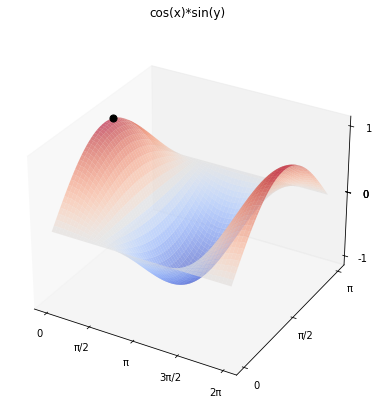

In [495]:
def func(x, y):
    return np.cos(x)*np.sin(y)
def grad(x, y):
    return np.array([-np.sin(x)*np.sin(y), np.cos(x)*np.cos(y)])
fig = plt.figure(figsize=(5,6))
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
ax = Axes3D(fig, computed_zorder=False)
ax.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.6)
x_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
x_labels = ["0", "π/2", "π", "3π/2", "2π"]
y_ticks = [0, np.pi/2, np.pi]
y_labels = ["0", "π/2", "π"]
z_ticks = [0, 1, 0, -1, 0]
z_labels = ["0", "1", "0", "-1", "0"]
ax.set_xticks(x_ticks, x_labels)
ax.set_yticks(y_ticks, y_labels)
ax.set_zticks(z_ticks, z_labels)
ax.set_title("cos(x)*sin(y)\n")
ax.grid(False)
# Gradiente
paso = 2
x_Coord = np.array([0.4*np.pi])
y_Coord = np.array([0.2*np.pi])
z_Coord = np.array([func(x_Coord[0], y_Coord[0])])
for n in range(10):
    GRAD = grad(x_Coord[n], y_Coord[n])
    x_Coord = np.append(x_Coord, x_Coord[n] + paso*GRAD[0])
    y_Coord = np.append(y_Coord, y_Coord[n] + paso*GRAD[1])
    z_Coord = np.append(z_Coord, func(x_Coord[n+1], y_Coord[n+1]))
#GIF
scat_1 = ax.scatter(x_Coord[0], y_Coord[0], z_Coord[0], c="black", s=50)
def animate(i):
    scat_1._offsets3d = (x_Coord[i:i+1], y_Coord[i:i+1], z_Coord[i:i+1])
    return scat_1
ani = animation.FuncAnimation(fig, animate, frames=len(z_Coord))
writer = animation.PillowWriter(fps=1)
ani.save("Imagenes/pasoGrande.gif", writer=writer)
plt.show()

### Error en codigo
Trate de implementar la funcion axuliar en una sola funcion y no en 3 -una por cada variable- ademas de que el codigo se hizo mas complejo, no funciono bien y me lleva en la direccion contraria al maximo

/var/folders/r9/15vjzr1568bb48gqfz9wkmzc0000gn/T/ipykernel_96003/415170348.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, computed_zorder=False)


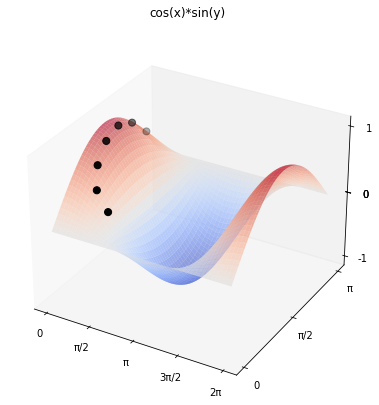

In [485]:
def func(x, y):
    return np.cos(x)*np.sin(y)
def grad(x, y):
    return np.array([-np.sin(x)*np.sin(y), np.cos(x)*np.cos(y)])
fig = plt.figure(figsize=(5,6))
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
ax = Axes3D(fig, computed_zorder=False)
ax.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.6)
x_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
x_labels = ["0", "π/2", "π", "3π/2", "2π"]
y_ticks = [0, np.pi/2, np.pi]
y_labels = ["0", "π/2", "π"]
z_ticks = [0, 1, 0, -1, 0]
z_labels = ["0", "1", "0", "-1", "0"]
ax.set_xticks(x_ticks, x_labels)
ax.set_yticks(y_ticks, y_labels)
ax.set_zticks(z_ticks, z_labels)
ax.set_title("cos(x)*sin(y)\n")
ax.grid(False)
# Gradiente
paso = 0.5
Coord = np.array([[0.4*np.pi, 0.2*np.pi]])
z_Coord = np.array([func(Coord[0][0], Coord[0][1])])
for n in range(6):
    Coord = np.append(Coord, [Coord[n] + paso*grad(Coord[n][0], Coord[n][0])], axis=0)
    z_Coord = np.append(z_Coord, func(Coord[n+1][0], Coord[n+1][1]))
ax.scatter(*zip(*Coord), z_Coord, c="black", s=50)
plt.show()

## Referencias
* https://stackoverflow.com/questions/51241367/matplotlib-surface-plot-hides-scatter-points-which-should-be-in-front
* https://stackoverflow.com/questions/37154329/jupyter-notebook-command-for-hide-the-output-of-a-cell

